In [1]:
import sys
sys.path.append("..")

from keras_object_detection import benchmarks, dataloader
from keras_object_detection.dataloader import augmentations

2021-11-14 09:10:29.288443: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/geekyrakshit/Workspace/keras-object-detection/venv/lib/python3.8/site-packages/cv2/../../lib64:
2021-11-14 09:10:29.288461: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
shapes_benchmark = benchmarks.ShapesBenchMark(height=448, width=448)
shapes_benchmark.set_label_map()
shapes_benchmark.make_dataset(n_data_samples=256)

print(f"Dataset Length: {len(shapes_benchmark)}")

100%|██████████| 256/256 [00:34<00:00,  7.52it/s]

Dataset Length: 256


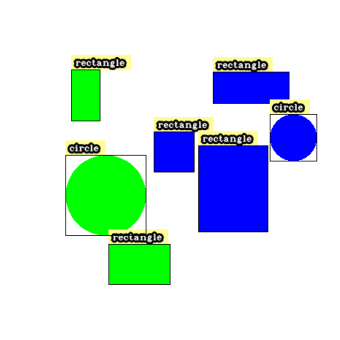

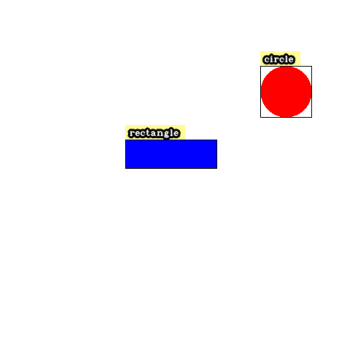

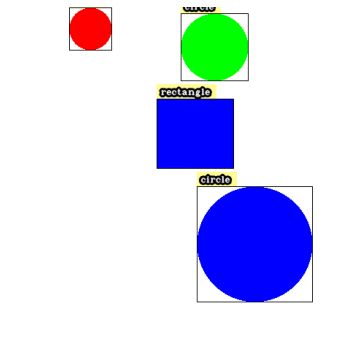

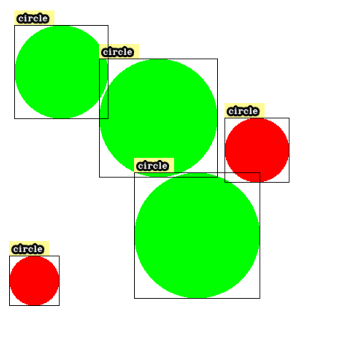

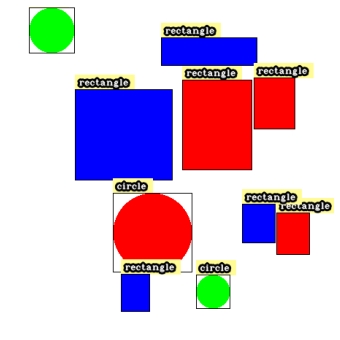

In [3]:
shapes_benchmark.plot_samples()

In [4]:
tfrecord_dir = shapes_benchmark.create_tfrecords()
tfrecord_dir

100%|██████████| 52/52 [00:00<00:00, 5601.31it/s]


'./dataset/shapes/tfrecords'

2021-11-14 09:11:04.850496: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-14 09:11:04.850812: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/geekyrakshit/Workspace/keras-object-detection/venv/lib/python3.8/site-packages/cv2/../../lib64:
2021-11-14 09:11:04.850857: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/geekyrakshit/Workspace/keras-object-detection/venv/lib/python3.8/site-packages/cv2/../../lib64:
2021-11-14 09:11:04.850897: W tensorflow/stream_executor/platform/default/dso_loader

tf.Tensor(b'./dataset/shapes/tfrecords/train/shapes-train-0064-0128.tfrec', shape=(), dtype=string) tf.Tensor(b'./dataset/shapes/tfrecords/val/shapes-val-0000-0064.tfrec', shape=(), dtype=string)


<BatchDataset shapes: ((None, None, None, 3), (None, 7, 7, 12)), types: (tf.float32, tf.float32)>

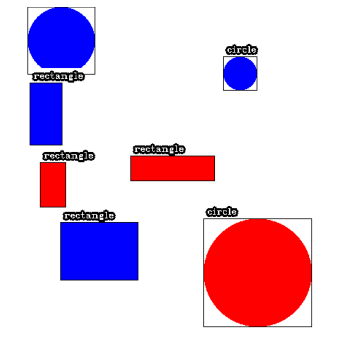

In [5]:
data_loader = dataloader.YOLOv1DataLoader(
    dataset_path=tfrecord_dir, run_sanity_checks=True
)
data_loader.add_augmentation(augmentations.random_flip_data)
train_dataset = data_loader.build_dataset(
    is_train=True, label_map=shapes_benchmark.label_map
)
train_dataset

In [6]:
x, y = next(iter(train_dataset))
print("x shpae:", x.shape)
print("y shpae:", y.shape)

x shpae: (8, 448, 448, 3)
y shpae: (8, 7, 7, 12)
